In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
# print(mouse_drug_data.head())
# print(clinical_trial_data.head())

# Combine the data into a single dataset
mouse_clinical_merge = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID", how="outer")


# Display the data table for preview
mouse_clinical_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = mouse_clinical_merge.groupby(['Drug','Timepoint']).mean().reset_index()
# Convert to DataFrame
mean_tumor_volume = mean_tumor_volume.drop('Metastatic Sites',axis=1)
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume)
# Preview DataFrame
mean_tumor_volume_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stderr_tumor_volume = mouse_clinical_merge.groupby(['Drug','Timepoint']).sem().reset_index()
# Convert to DataFrame
stderr_tumor_volume = stderr_tumor_volume.drop(['Metastatic Sites','Mouse ID'],axis=1)
stderr_tumor_volume_df = pd.DataFrame(stderr_tumor_volume)
# Preview DataFrame
stderr_tumor_volume_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_df_reshape = mean_tumor_volume_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
stderr_tumor_volume_df_reshape = stderr_tumor_volume_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# mean_tumor_vol_reshape_df = mouse_clinical_merge.groupby(['Drug','Timepoint']).mean().drop('Metastatic Sites',axis=1).unstack().transpose()
# # mean_tumor_vol_reshape_df = mean_tumor_vol_reshape.transpose()

# Preview that Reformatting worked
print(mean_tumor_volume_df_reshape.head())
print(stderr_tumor_volume_df_reshape.head())
# mean_tumor_vol_reshape_df.reset_index().drop('level_0',axis=1)
# mean_tumor_vol_reshape_df.set_index('Timepoint')

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334  
Drug       Capomulin  Ceftamin  Infubinol  Ketapril  N

In [5]:
x_axis = np.arange(0, len(mean_tumor_volume_df_reshape), 1)
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

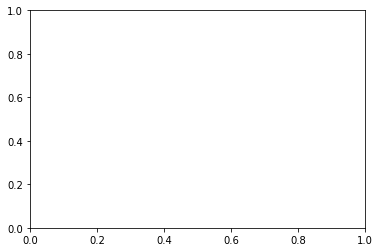

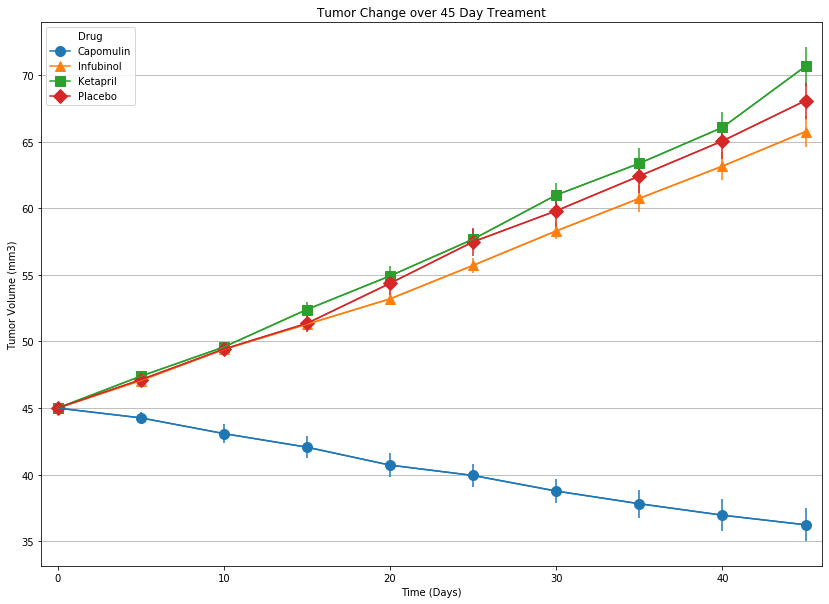

In [6]:
# Generate the Plot (with Error Bars)
fig, ax1 = plt.subplots()

ax1 = mean_tumor_volume_df_reshape.loc[:,['Capomulin','Infubinol','Ketapril','Placebo']].plot(figsize=(14,10), yerr = stderr_tumor_volume_df_reshape, legend = False)
ax1.set_prop_cycle(None)
mean_tumor_volume_df_reshape.loc[:,['Capomulin','Infubinol','Ketapril','Placebo']].plot(figsize=(14,10), style=['o-', '^-', 's-', 'D-'], markersize=10, ax = ax1)

ax1.set_xlim(-1, max(mean_tumor_volume_df['Timepoint']) + 1)

ax1.set_xlabel("Time (Days)")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_title("Tumor Change over 45 Day Treament")
ax1.grid(which='major', axis='y')
# Save the Figure

plt.savefig('tumorchange.png')

In [7]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site = mouse_clinical_merge.groupby(['Drug','Timepoint']).mean().reset_index()
mean_met_site = mean_met_site.drop('Tumor Volume (mm3)',axis=1)
# Convert to DataFrame
mean_met_site_df = pd.DataFrame(mean_met_site)
# Preview DataFrame
mean_met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stderr_met_site = mouse_clinical_merge.groupby(['Drug','Timepoint']).sem().reset_index()
# Convert to DataFrame
stderr_met_site = stderr_met_site.drop(['Tumor Volume (mm3)','Mouse ID'],axis=1)
stderr_met_site_df = pd.DataFrame(stderr_met_site)
# Preview DataFrame
stderr_met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [24]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_site_df_reshape = mean_met_site_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
stderr_met_site_df_reshape = stderr_met_site_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
# print(mean_met_site_df_reshape.head())
# print(stderr_met_site_df_reshape.head())
mean_met_site_df_reshape.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [23]:
stderr_met_site_df_reshape.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [15]:
x2_axis = np.arange(0, len(mean_met_site_df_reshape), 1)
x2_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

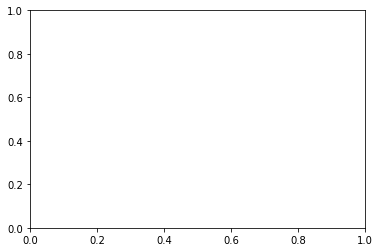

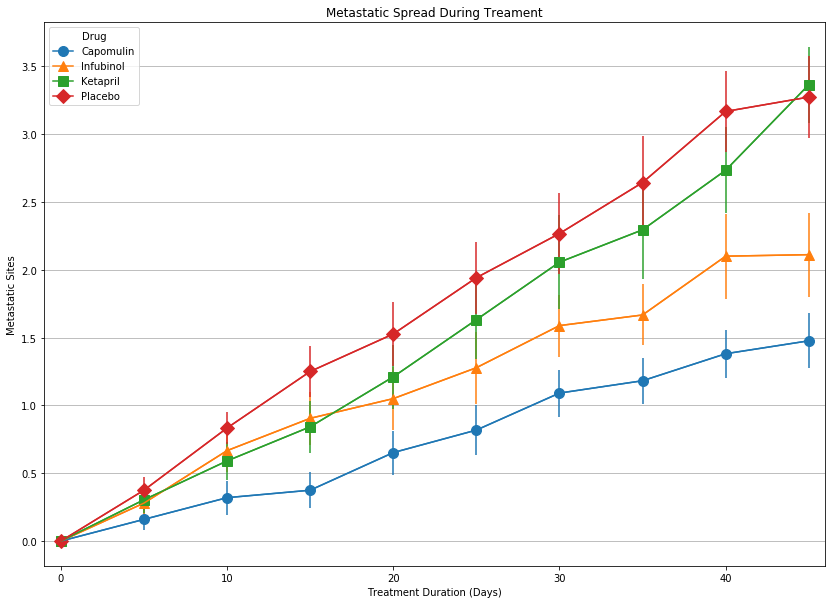

In [16]:
# Generate the Plot (with Error Bars)
fig, ax2 = plt.subplots()

ax2 = mean_met_site_df_reshape.loc[:,['Capomulin','Infubinol','Ketapril','Placebo']].plot(figsize=(14,10), yerr = stderr_met_site_df_reshape, legend = False)
ax2.set_prop_cycle(None)
mean_met_site_df_reshape.loc[:,['Capomulin','Infubinol','Ketapril','Placebo']].plot(figsize=(14,10), style=['o-', '^-', 's-', 'D-'], markersize=10, ax = ax2)

ax2.set_xlim(-1, max(mean_met_site_df['Timepoint']) + 1)

ax2.set_xlabel("Treatment Duration (Days)")
ax2.set_ylabel("Metastatic Sites")
ax2.set_title("Metastatic Spread During Treament")
ax2.grid(which='major', axis='y')
# Save the Figure
plt.savefig('spreadchange.png')
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [21]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = mouse_clinical_merge.groupby(['Drug','Timepoint']).agg({'Mouse ID': 'nunique'}).reset_index()
# mice_count
# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count)
mice_count_df.rename(columns = {'Mouse ID':'Mouse Count'}, inplace = True)
# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [22]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_df_reshape = mice_count_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
# Preview the Data Frame
mice_count_df_reshape.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


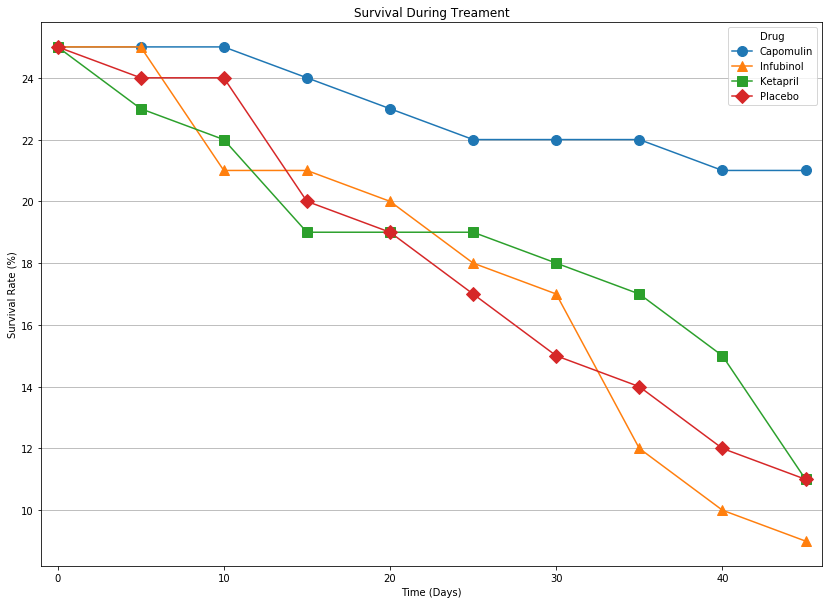

In [26]:
# Generate the Plot (Accounting for percentages)
fig, ax3 = plt.subplots()

mice_count_df_reshape.loc[:,['Capomulin','Infubinol','Ketapril','Placebo']].plot(figsize=(14,10), style=['o-', '^-', 's-', 'D-'], markersize=10, ax = ax3)

ax3.set_xlim(-1, max(mice_count_df['Timepoint']) + 1)

ax3.set_xlabel("Time (Days)")
ax3.set_ylabel("Survival Rate (%)")
ax3.set_title("Survival During Treament")
ax3.grid(which='major', axis='y')
# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)